In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import QuantileTransformer, StandardScaler


In [33]:
data = np.concatenate(
    [
        np.linspace(2, 3, 20),
        np.array([np.nan] * 5 + [np.inf] * 3 + [-1e10] + [1e20] + [0.0]),
    ]
)

print(sorted(data))


[-10000000000.0, 0.0, 2.0, 2.0526315789473686, 2.1052631578947367, 2.1578947368421053, 2.2105263157894735, 2.263157894736842, 2.3157894736842106, 2.3684210526315788, 2.4210526315789473, 2.473684210526316, 2.526315789473684, 2.5789473684210527, 2.6315789473684212, 2.6842105263157894, 2.736842105263158, 2.7894736842105265, 2.8421052631578947, 2.894736842105263, 2.9473684210526314, 3.0, nan, nan, nan, nan, nan, 1e+20, inf, inf, inf]


In [40]:
class SmartNormalizer:
    def __init__(self, two_col=False):
        self.quantile_transformer = QuantileTransformer(output_distribution="normal")
        self.two_col = two_col

    def fit(self, data):
        assert type(data) == np.ndarray
        data = data.copy().ravel()
        good_mask = np.isfinite(data)
        data = data[good_mask]
        data = data.reshape(-1, 1)
        self.quantile_transformer.fit(data)

    def transform(self, data):
        data = data.copy().ravel()
        good_mask = np.isfinite(data)
        data[~good_mask] = 0
        data = data.reshape(-1, 1)
        first_col = self.quantile_transformer.transform(data)
        data[~good_mask] = 0
        if self.two_col:
            second_col = good_mask.astype(np.float32).reshape(-1, 1)
            return np.concatenate([first_col, second_col], axis=1)
        else:
            return first_col.reshape(-1, 1)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1.]


/Users/mike/.pyenv/versions/3.10.14/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:2785: UserWarning: n_quantiles (1000) is greater than the total number of samples (23). n_quantiles is set to n_samples.
  warnings.warn(


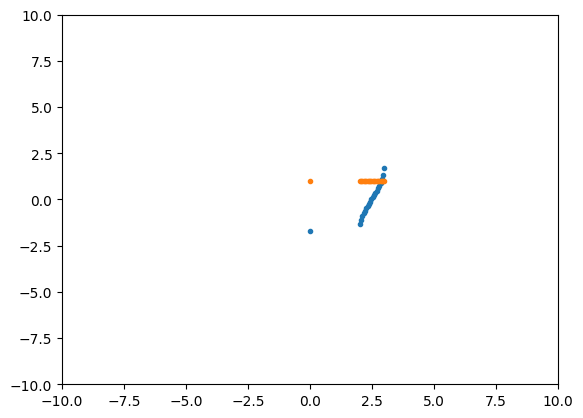

In [41]:
normalizer = SmartNormalizer(two_col=True)
normalizer.fit(data)
print(normalizer.transform(data)[:, 1])

import matplotlib.pyplot as plt

plt.plot(data, normalizer.transform(data), ".")
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()
